<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# __K Means Clustering with Python__

Estimated time needed: **45** minutes


How do brands always know which new products should recommend to me? Can they read my mind? Well, sort of. By (legally) gathering information about you and your purchasing habits, corporations are able to group you with other customers that have similar characteristics. K Means clustering is one such algorithm that can categorize similar people! Then, companies can determine this population's potential preferences and personalize your experience with the brand, which ranges from product recommendations to email marketing content. 

In this notebook, you will learn the fundamentals of how to accomplish grouping with K Means and use it for segmenting mall customers and images.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/online-shopping.jpg" style="width: 60%">


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Introduction">Introduction</a>
        <ol>
            <li><a href="#How-does-K-Means-Clustering-work?">How does K Means Clustering work?</a></li>
        </ol>
    </li>
    <li><a href="#Example-1:-Visual-intuition">Example 1: Visual Intuition</a></li>
    <li>
        <a href="#Example-2:-Segmenting-Customer-Data">Example 2: Segmenting Customer Data</a>
        <ol>
            <li><a href="#Problem-Statement">Problem Statement</a></li>
            <li><a href="#About-the-dataset">About the Dataset</a></li>
            <li><a href="#Loading-the-dataset">Loading the Dataset</a></li>
            <li><a href="#Getting-familiar-with-the-data">Getting familiar with the data</a></li>
            <li><a href="#Clustering-the-data-using-K-Means">Clustering the data using K Means</a></li>
        </ol>
    </li>
    <li>
        <a href="#Example-3:-Image-Segmentation">Example 3: Image Segmentation</a>
        <ol>
            <li><a href="#Loading-the-data">Loading the Data</a></li>
            <li><a href="#Segmenting-the-image-using-2-clusters">Segmenting the image using 2 clusters</a></li>
            <li><a href="#Converting-to-black-and-white">Converting to black and white</a></li>
        </ol>
    </li>    
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---Fitting-KMeans-With-k=2">Exercise 1 - Fitting K Means with k=2</a></li>
    <li><a href="#Exercise-2---Viewing-Segmented-Image">Exercise 2 - Viewing Segmented Image</a></li>
    <li><a href="#Exercise-3---Fitting-KMeans-With-k=4-and-Viewing-Segmented-Image">Exercise 3 - Fitting K Means with k=4 and Viewing Segmented Image</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 - Explain the theory behind K Means Clustering
 - Implement K Means Clustering to perform exploratory data analysis
 - Perform Image segmentation using K Means


----


## Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the corresponding code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

# Parameters:
# -q: quiet mode (reduces output verbosity)
# -y: automatically answer yes to any prompts
# pandas: data manipulation and analysis library
# numpy: numerical computing library for arrays and mathematical operations
# matplotlib: data visualization library for creating plots and charts
# scikit-learn: machine learning library containing clustering algorithms

### Importing Required Libraries


In [ ]:
# Define a custom warning function that does nothing (suppresses warnings)
def warn(*args, **kwargs):
    pass

# Import the warnings module for handling warning messages
import warnings

# Override the default warn function with our custom one that suppresses warnings
warnings.warn = warn

# Ignore all warning messages throughout the notebook
warnings.filterwarnings('ignore')

# Import numpy for numerical operations and array manipulations
import numpy as np

# Import pandas for data manipulation and analysis using DataFrames
import pandas as pd

# Import KMeans clustering algorithm from scikit-learn
# Parameters: n_clusters (number of clusters), random_state (for reproducibility)
from sklearn.cluster import KMeans

# Import matplotlib.pyplot for creating visualizations and plots
from matplotlib import pyplot as plt

# Enable inline plotting in Jupyter notebooks (displays plots directly below code cells)
%matplotlib inline

## Introduction


K Means Clustering is an unsupervised machine learning algorithm that organizes data into distinct groups based on certain similarities. The principle underlying the algorithm is simple to understand and is a great introduction to the potential of unsupervised learning algorithms for exploratory data analysis. In this lab, we will brush up on the basic theory underlying the algorithm and then go ahead and apply it ourselves to a real problem.


### About K Means

|       Pros       |       Cons       |
| ---------------- | ------- |
| Easy to implement | Must manually chose K |
| Always converges to local minimum | Not guaranteed to find global minimum |
| Scales well to large datasets | May not perform well on data of varying density |
| Generalizes to clusters of different shapes and sizes | Clusters are biased by outliers |


### How does K Means Clustering work?


The KMeans algorithm is quite simple and can be broken down into the following steps:

<ol>
    <li>We specify the hyperparameter <code>k</code>, which refers to the number of clusters we want our data to be clustered into.</li>
    <li>Then <code>k</code> centroids, or cluster-means, are initialized at random.</li>
    <li>Finally, the optimal centroid locations are found. This is done by the following algorithmic loop:</li>
    <ol>
        <li><b>Assignment step:</b> Assign each data point to the nearest centroid (calculated as the squared distance from the data point to centroid).</li>
        <li><b>Update step:</b> Recompute each centroid as the mean of the data points assigned to that cluster in the previous step.</li>
    </ol>
    <li>We repeat the above step until the centroid locations remain unchanged. This tells us the algorithm has converged on a local optima and gives us the final cluster assignments for that run.</li>
</ol>


## Example 1: Visual intuition
Take a look at the following animation for some physical intuition of what's going on during each iteration.

It shows several iterations of K Means Clustering (steps 3 & 4 in previous section) applied to a sample dataset with <code>k = 2</code> clusters.

![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/KMeansClustering_example.gif)

In each iteration, you can see the previous locations of the centroids (faded) and their current location after they were moved to the mean of the data points assigned to that cluster. The data points are colored by the cluster they are assigned to after that iteration.

Finally, on iteration 6, we see the centroids of the clusters remain unchanged - this means the KMeans algorithm has converged and finished.


## Example 2: Segmenting Customer Data

While the theory and implementation of these algorithms are fascinating in their own right, as data scientists we're driven by the insights we can uncover and the stories we can tell with data.

Now more than ever, companies are making data driven business decisions, in part thanks to the massive increase of data available, as well as the availability of computational power to process and make sense of the data.

Customer segmentation is a process where customers are grouped together based on some common characteristics. For example, customers can be divided based on age, gender, income, marital status, and others. Segmenting customers in this way can have several applications for a business. For instance, common characteristics of the most profitable customers can be identified and a tailored marketing strategy can be implemented to target them.

Let's have a go at customer segmentation using the K Means Clustering algorithm.


### Problem Statement

Suppose you are a data scientist at MegaMind Sporting Goods Ltd.

You've been tasked with segmenting customers into groups depending on their purchasing habits.

Once you have this information, your colleague John will be able to generate clothing recommendations tailored for each customer group.


### About the dataset

We will explore a simple example of customer segmentation using the [Mall Customers](https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv) dataset. This is an artificial dataset that contains data on customers of a shopping mall. In particular, the following features are given about each customer.

* **CustomerID** - A unique identifying number for each customer
* **Gender**
* **Age**
* **Annual Income** - The annual income of the customer given in thousands of dollars
* **Spending Score** - A value given to the customer based on their spending habits, such as total spending and frequency. A higher value indicates a higher value customer for the mall


### Loading the dataset


In [ ]:
# Download the dataset from the URL and read it into a Pandas DataFrame
# Parameters:
#   - First argument: URL string pointing to the CSV file location
#   - index_col=0: Use the first column (CustomerID) as the DataFrame index
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/CustomerData.csv', index_col=0)

Let's take a peek at our dataset to ensure it was loaded properly.


In [ ]:
# Display the first 5 rows of the DataFrame to preview the data structure
# Returns: DataFrame with first 5 rows showing CustomerID, Gender, Age, Annual Income, and Spending Score
df.head()

### Getting familiar with the data

First, let's take a look at the data we have to gain a better general understanding of it before we attempt any clustering.

Let's start by looking at the distributions of some of the features.


We can start by analyzing the ratio of male to female customers that were surveyed.


In [ ]:
# Count the number of male customers in the dataset
# Filter DataFrame where Gender column equals 'Male' and get the row count (shape[0])
num_male = df[df['Gender'] == 'Male'].shape[0]

# Count the number of female customers in the dataset
# Filter DataFrame where Gender column equals 'Female' and get the row count (shape[0])
num_female = df[df['Gender'] == 'Female'].shape[0]

# Create a pie chart to visualize the gender distribution
# Parameters:
#   - First argument: list of values [num_male, num_female] representing slice sizes
#   - labels: list of labels for each slice ['Male', 'Female']
#   - startangle=90: rotate the chart 90 degrees counterclockwise
#   - autopct='%1.f%%': display percentage format with no decimal places
#   - colors: list of colors for each slice ['lavender', 'thistle']
plt.pie(
    [num_male, num_female],
    labels=['Male', 'Female'],
    startangle=90,
    autopct='%1.f%%',
    colors=['lavender', 'thistle'])

# Add a title to the pie chart
plt.title('Gender of survey respondants')

# Display the plot
plt.show()

We see that we have slightly more female respondents in our survey. Next, let's plot histograms of the age and annual incomes of the customers.


In [ ]:
# Create a histogram to visualize the distribution of annual income
# Parameters:
#   - df['Annual Income (k$)']: column containing annual income values in thousands of dollars
#   - bins=10: divide the data into 10 equal-width bins/bars
plt.hist(df['Annual Income (k$)'], bins=10)

# Display the histogram
plt.show()

Our distribution appears slightly skewed to the right. Not as many people are making over $100k per year.

Let's take a look at people's annual income vs. spending score:


In [ ]:
# Extract the two features we want to analyze and cluster
# Select only 'Annual Income (k$)' and 'Spending Score (1-100)' columns from the DataFrame
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Create a scatter plot to visualize the relationship between annual income and spending score
# Parameters:
#   - X['Annual Income (k$)']: x-axis values (annual income in thousands)
#   - X['Spending Score (1-100)']: y-axis values (spending score from 1 to 100)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])

# Display the scatter plot
plt.show()

This looks promising, we can see our customers seem to fall into ~5 categories:
 1. __Low__ income, __high__ spending.
 2. __High__ income, __low__ spending.
 3. __Low__ income, __low__ spending.
 4. __High__ income, __low__ spending.
 5. __Medium__ income, __medium__ spending.

If we manage to segment our existing customers into these 5 categories, we will obtain exactly the information John requires:


### Clustering the data using K Means

Let's start clustering our data!

To do so, we simply load the <code>sklearn.cluster.KMeans</code> object - with our desired number of clusters <code>k = 5</code>:


In [ ]:
# Initialize the KMeans clustering algorithm
# Parameters:
#   - n_clusters=5: number of clusters (k) to form
#   - random_state=42: seed for random number generator (ensures reproducibility)
km = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model to the data X
# This performs the clustering algorithm to find optimal cluster centers
# The algorithm iteratively assigns points to nearest centroid and updates centroids
km.fit(X)

In [ ]:
# Iterate through each unique cluster label and plot points by cluster
# np.unique(km.labels_) returns array of unique cluster labels (0, 1, 2, 3, 4)
for label in np.unique(km.labels_):
    # Extract all data points that belong to the current cluster
    # km.labels_ contains the cluster assignment for each data point
    X_ = X[label == km.labels_]
    
    # Create a scatter plot for the current cluster
    # Parameters:
    #   - X_['Annual Income (k$)']: x-axis values for points in this cluster
    #   - X_['Spending Score (1-100)']: y-axis values for points in this cluster
    #   - label: cluster number for the legend
    plt.scatter(X_['Annual Income (k$)'], X_['Spending Score (1-100)'], label=label)

# Display the plot with different colors for each cluster
plt.show()

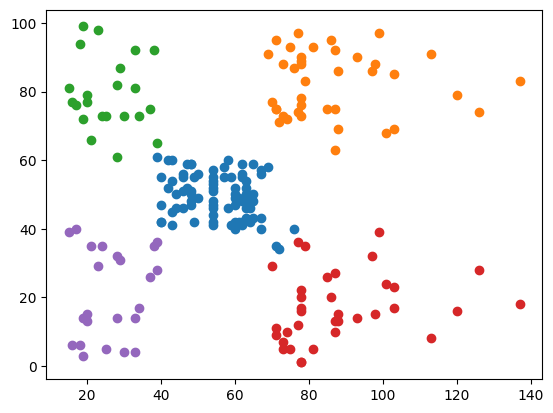

In [9]:
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['Annual Income (k$)'], X_['Spending Score (1-100)'], label=label)
plt.show()

Awesome! Our KMeans algorithm was able to correctly group our data into the 5 categories that we initially noticed


## Example 3: Image Segmentation

Image segmentation is the process of locating objects and boundaries in an image.

Various clustering can be used for this task.

__How__ is this done?:
 1. We cluster pixels using their brightness (grayscale) or RGB values (color).
 2. We replace each pixel with the average brightness or RGB value of pixels in their cluster.

Let's look at an example using KMeans:


In [ ]:
# Import required libraries for image processing
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # Python Imaging Library for image handling
import urllib.request  # For downloading images from URLs

# The URL of the image to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png'

# 1. Open the URL and read the image data
# urlopen() opens the URL connection and returns a response object
with urllib.request.urlopen(url) as url_response:
    # 2. Open the image data with Pillow
    # Image.open() reads the image from the response object
    img = Image.open(url_response)
    
    # 3. Convert the Pillow image to a NumPy array
    # This converts the image to a numerical array for processing
    # Grayscale images have shape (height, width) with pixel values 0-255
    img = np.array(img)

# Print the dimensions of the image (height x width in pixels)
# shape[0] = height, shape[1] = width
print(f'The image is {img.shape[0]}px by {img.shape[1]}px')

# Turn off axis labels and ticks for cleaner image display
plt.axis('off')

# Display the image array as an image
plt.imshow(img)

The image is 490px by 487px


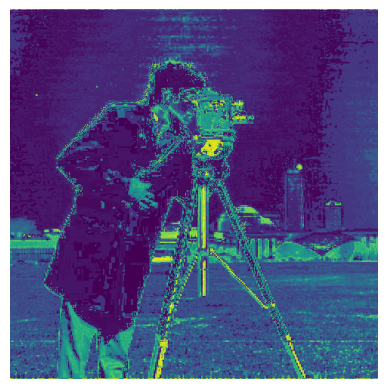

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request

# The URL of the image
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png'

# 1. Open the URL and read the image data
with urllib.request.urlopen(url) as url_response:
    # 2. Open the image data with Pillow
    img = Image.open(url_response)
    # 3. Convert the Pillow image to a NumPy array
    img = np.array(img)

# img = plt.imread('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png')
print(f'The image is {img.shape[0]}px by {img.shape[1]}px')
plt.axis('off')
plt.imshow(img)

In [ ]:
# Set the number of clusters for image segmentation
k = 2

# Reshape the 2D image array into a 1D array of pixel values
# Original shape: (height, width) -> New shape: (height*width, 1)
# Each row represents a single pixel's brightness value (0-255 for grayscale)
# The -1 means "calculate this dimension automatically" = height*width
# The 1 means each pixel is represented by 1 feature (brightness)
X = img.reshape(-1, 1)

# Initialize KMeans clustering algorithm
# Parameters:
#   - n_clusters=k: create k=2 clusters (2 brightness levels)
#   - random_state=42: seed for reproducibility of initial centroid positions
km = KMeans(n_clusters=k, random_state=42)

In [ ]:
# Fit the KMeans model to the reshaped pixel data
# This clusters all pixels into k=2 groups based on their brightness values
# After fitting:
#   - km.labels_ contains cluster assignment for each pixel (0 or 1)
#   - km.cluster_centers_ contains the mean brightness value for each cluster
km.fit(X)

In [13]:
km.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# Create a segmented image by replacing each pixel with its cluster center value
# Initialize an array of zeros with the same shape as X (flattened pixel array)
seg = np.zeros(X.shape)

# Iterate through each cluster (0 to k-1)
for i in range(k):
    # Replace pixel values with the cluster center value for all pixels in cluster i
    # km.labels_ == i creates a boolean mask selecting pixels assigned to cluster i
    # km.cluster_centers_[i] is the mean brightness value of cluster i
    # This replaces all pixels in cluster i with their cluster's average brightness
    seg[km.labels_ == i] = km.cluster_centers_[i]

# Reshape the 1D segmented array back to the original 2D image shape
# This converts from (height*width, 1) back to (height, width)
seg = seg.reshape(img.shape)

# Display the segmented image where pixels are replaced by their cluster means
plt.imshow(seg)

### Image Segmentation Process

The image segmentation replaces each pixel with its cluster's mean value:

For each pixel $p$ in the image:
$$p_{\text{segmented}} = \mu_{c(p)}$$

Where:
- $p_{\text{segmented}}$ = the new pixel value in the segmented image
- $c(p)$ = the cluster assignment for pixel $p$ (determined by KMeans)
- $\mu_{c(p)}$ = the centroid (mean brightness) of the cluster that pixel $p$ belongs to

**Mathematical representation:**
$$\text{seg}[j] = \begin{cases} 
\mu_0 & \text{if pixel } j \text{ belongs to cluster 0} \\
\mu_1 & \text{if pixel } j \text{ belongs to cluster 1} \\
\vdots \\
\mu_{k-1} & \text{if pixel } j \text{ belongs to cluster } k-1
\end{cases}$$

This effectively reduces the number of distinct brightness values in the image from 256 (0-255) to $k$ values (the cluster centers).

In [ ]:
# Create a black and white version of the segmented image
# Initialize an array of zeros with same shape as X
seg = np.zeros(X.shape)

# Iterate through each cluster
for i in range(k):
    # Apply threshold to convert to pure black (0) or white (255)
    # If cluster center brightness > 0.5 (assuming normalized 0-1), set pixels to white (255)
    # Otherwise, set pixels to black (0)
    # This creates a binary (two-color) image
    seg[km.labels_ == i] = 255 if km.cluster_centers_[i] > 0.5 else 0

# Reshape back to original image dimensions
seg = seg.reshape(img.shape)

# Convert to unsigned 8-bit integer (standard image format with values 0-255)
seg = seg.astype(np.uint8)

# Display the black and white segmented image
plt.imshow(seg)

Awesome! Even as humans, we can still easily recognize our image after segmentation with <code>k = 2</code> colors.

### Converting to black and white

Alternatively, we may view the image in black and white:


In [ ]:
# Import required libraries for image processing
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # Python Imaging Library for image handling
import urllib.request  # For downloading images from URLs

# The URL of the kingfisher image to download for exercises
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/kingfisher.jpeg'

# 1. Open the URL and read the image data
# urlopen() establishes connection and returns response object
with urllib.request.urlopen(url) as url_response:
    # 2. Open the image data with Pillow
    # Image.open() reads and decodes the JPEG image from response
    img = Image.open(url_response)
    
    # 3. Convert the Pillow image to a NumPy array
    # Color (RGB) images have shape (height, width, 3) where 3 represents R, G, B channels
    # Each channel has pixel values 0-255
    img = np.array(img)

# Display the color image with matplotlib
plt.imshow(img)

# Turn off axis labels and ticks for cleaner display
plt.axis('off')

# Display the image again (redundant but kept from original code)
plt.imshow(img)

# Exercises

In this section, we will segment another image; this time in full-color with various values for k.

Please run the following cell to load the data for the exercises:


In [ ]:
# Set the number of clusters for RGB image segmentation
k = 2

# Reshape the 3D RGB image array into a 2D array
# Original shape: (height, width, 3) -> New shape: (height*width, 3)
# Each row represents one pixel with 3 features: Red, Green, Blue values (0-255 each)
# The -1 calculates the number of pixels automatically = height*width
# The 3 represents the RGB color channels
X = img.reshape(-1, 3)

# Initialize KMeans clustering algorithm for color segmentation
# Parameters:
#   - n_clusters=k: create k=2 color clusters
#   - random_state=42: seed for reproducibility
km = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to cluster pixels by color similarity
# Pixels with similar RGB values will be grouped together
km.fit(X)

### Exercise 1 - Fitting KMeans With k=2


In [17]:
k = 2

X = img.reshape(-1, 3) # Remember, since image is RGB
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# Create segmented RGB image by replacing each pixel with its cluster's mean color
# Initialize array of zeros with same shape as X (flattened RGB pixel array)
seg = np.zeros(X.shape)

# Iterate through each color cluster
for i in range(k):
    # Replace RGB values with the cluster center color for all pixels in cluster i
    # km.labels_ == i: boolean mask selecting pixels assigned to cluster i
    # km.cluster_centers_[i]: the mean RGB color [R, G, B] of cluster i
    # This replaces all pixels in cluster i with their cluster's average color
    seg[km.labels_ == i] = km.cluster_centers_[i]

# Reshape the flattened segmented array back to original 3D image shape
# Convert from (height*width, 3) back to (height, width, 3)
seg = seg.reshape(img.shape)

# Convert to unsigned 8-bit integer (standard RGB image format: 0-255 per channel)
seg = seg.astype(np.uint8)

# Display the color-segmented image with k distinct colors
plt.imshow(seg)

### Exercise 2 - Viewing Segmented Image


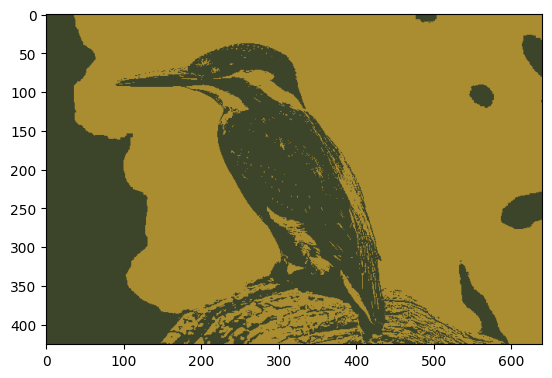

In [18]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)

In [ ]:
# Set the number of clusters to 4 for more detailed color segmentation
k = 4

# Reshape the 3D RGB image into a 2D array for clustering
# Original: (height, width, 3) -> New: (height*width, 3)
# Each row = one pixel with [R, G, B] values
X = img.reshape(-1, 3)

# Initialize KMeans with 4 clusters
# Parameters:
#   - n_clusters=k: divide image into k=4 color groups
#   - random_state=42: ensures reproducible results
km = KMeans(n_clusters=k, random_state=42)

# Fit the model to find 4 representative colors in the image
km.fit(X)

# Create the segmented image by replacing pixels with cluster means
seg = np.zeros(X.shape)

# Replace each pixel's color with its cluster's average color
for i in range(k):
    # Assign cluster center color to all pixels in that cluster
    seg[km.labels_ == i] = km.cluster_centers_[i]

# Reshape back to 3D image format (height, width, 3)
seg = seg.reshape(img.shape)

# Convert to standard 8-bit RGB format (0-255)
seg = seg.astype(np.uint8)

# Display the segmented image with 4 distinct colors
plt.imshow(seg)

### Exercise 3 - Fitting KMeans With k=4 and Viewing Segmented Image


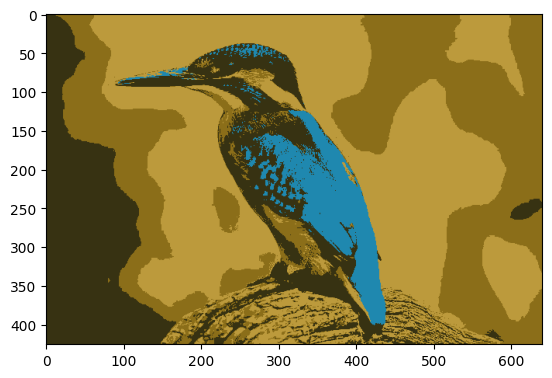

In [19]:
k = 4

X = img.reshape(-1, 3) # Remember, since image is RGB
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)

<details>
    <summary>Click here for Solution</summary>

```python
k = 4

X = img.reshape(-1, 3) # Remember, since image is RGB
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)
```

</details>


Congratulations! You've completed the exercises. Later, you will learn about another clustering algorithm, GMM, which performs even better on image segmentation.


### Thank you for completing this lab!

## Author


[David Pasternak](https://www.linkedin.com/in/david-pasternak-6b84a2208/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)

[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)

### Other Contributors


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2022-03-28        | 0.1     | David Pasternak      | Created Lab    |
| 2022-05-10        | 0.2     | Sam Prokopchuk      | Complete Draft of Lab    |

## <h3 align="center"> © IBM Corporation 2022. All rights reserved. <h3/>
